In [6]:
!pip install torch torchvision tensorflow


Defaulting to user installation because normal site-packages is not writeable
  Using cached torch-2.6.0-cp312-cp312-win_amd64.whl.metadata (28 kB)
  Using cached torchvision-0.21.0-cp312-cp312-win_amd64.whl.metadata (6.3 kB)
  Using cached networkx-3.4.2-py3-none-any.whl.metadata (6.3 kB)
  Using cached fsspec-2025.2.0-py3-none-any.whl.metadata (11 kB)
Using cached torch-2.6.0-cp312-cp312-win_amd64.whl (204.1 MB)
Using cached torchvision-0.21.0-cp312-cp312-win_amd64.whl (1.6 MB)
   ---------------------------------------- 0.0/390.3 MB ? eta -:--:--
   - -------------------------------------- 14.7/390.3 MB 92.4 MB/s eta 0:00:05
   -- ------------------------------------- 21.0/390.3 MB 49.1 MB/s eta 0:00:08
   --- ------------------------------------ 31.5/390.3 MB 60.6 MB/s eta 0:00:06
   --- ------------------------------------ 37.7/390.3 MB 45.3 MB/s eta 0:00:08
   ------ --------------------------------- 60.6/390.3 MB 58.5 MB/s eta 0:00:06
   -------- ------------------------------- 

In [7]:
import torch
import torchvision
import torchvision.transforms as transforms

# Define the transform to convert images to tensors
transform = transforms.ToTensor()

# Download and load the MNIST dataset for training and testing
train_dataset = torchvision.datasets.MNIST(root='./data', train=True, transform=transform, download=True)
test_dataset = torchvision.datasets.MNIST(root='./data', train=False, transform=transform, download=True)

# Check dataset size
print(f"Training data size: {len(train_dataset)}")
print(f"Testing data size: {len(test_dataset)}")


100%|██████████| 9.91M/9.91M [00:02<00:00, 4.65MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 134kB/s]
100%|██████████| 1.65M/1.65M [00:01<00:00, 1.15MB/s]
100%|██████████| 4.54k/4.54k [00:00<?, ?B/s]

Training data size: 60000
Testing data size: 10000


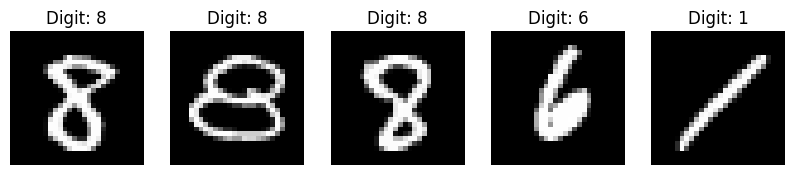

In [16]:
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

# Define transform
transform = transforms.ToTensor()

# Load MNIST dataset
train_dataset = torchvision.datasets.MNIST(root='./data', train=True, transform=transform, download=True)

# Select 5 random images
indices = torch.randint(0, len(train_dataset), (5,))
fig, axes = plt.subplots(1, 5, figsize=(10, 2))

for i, idx in enumerate(indices):
    image, label = train_dataset[idx]
    axes[i].imshow(image.squeeze(), cmap="gray")
    axes[i].set_title(f"Digit: {label}", fontsize=12)  # Show GT/label as title
    axes[i].axis("off")

plt.show()


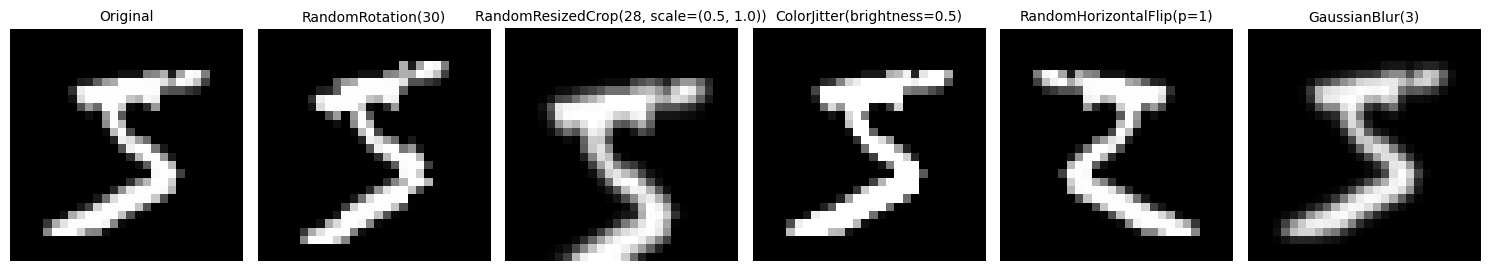

In [17]:
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
from PIL import Image

# Load MNIST dataset
transform = transforms.ToTensor()
train_dataset = torchvision.datasets.MNIST(root='./data', train=True, transform=transform, download=True)

# Select a random image from the dataset
image, label = train_dataset[0]  # Taking the first image
image = transforms.ToPILImage()(image)  # Convert tensor to PIL image

# Define transformations
transformations = {
    "Original": None,
    "RandomRotation(30)": transforms.RandomRotation(30),
    "RandomResizedCrop(28, scale=(0.5, 1.0))": transforms.RandomResizedCrop(28, scale=(0.5, 1.0)),
    "ColorJitter(brightness=0.5)": transforms.ColorJitter(brightness=0.5),
    "RandomHorizontalFlip(p=1)": transforms.RandomHorizontalFlip(p=1),
    "GaussianBlur(3)": transforms.GaussianBlur(3)
}

# Apply transformations and visualize
fig, axes = plt.subplots(1, 6, figsize=(15, 3))

for i, (name, transform_fn) in enumerate(transformations.items()):
    if transform_fn:
        transformed_image = transform_fn(image)  # Apply transformation to PIL image
    else:
        transformed_image = image  # Keep original for reference
    
    axes[i].imshow(transformed_image, cmap="gray")
    axes[i].set_title(name, fontsize=10)
    axes[i].axis("off")

plt.tight_layout()
plt.show()



In [15]:
import torch
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader

# Load MNIST dataset
transform = transforms.ToTensor()
train_dataset = torchvision.datasets.MNIST(root='./data', train=True, transform=transform, download=True)

# Define batch sizes to test
batch_sizes = [10, 25, 64, 128, 256, 512]

# Get total number of samples in dataset
total_samples = len(train_dataset)

# Function to count batches
def count_batches(batch_size, drop_last):
    dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=False, drop_last=drop_last)
    return len(dataloader)

# Analyze batch counts for each batch size
print(f"Total Samples: {total_samples}\n")
print("Batch Size | Batches (drop_last=False) | Batches (drop_last=True)")
print("-" * 60)

for batch_size in batch_sizes:
    batches_default = count_batches(batch_size, drop_last=False)
    batches_drop_last = count_batches(batch_size, drop_last=True)
    print(f"{batch_size:^10} | {batches_default:^25} | {batches_drop_last:^25}")



Total Samples: 60000

Batch Size | Batches (drop_last=False) | Batches (drop_last=True)
------------------------------------------------------------
    10     |           6000            |           6000           
    25     |           2400            |           2400           
    64     |            938            |            937           
   128     |            469            |            468           
   256     |            235            |            234           
   512     |            118            |            117           
